In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('fake_reviews.csv')

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.drop(columns = {'category'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [6]:
df.rename(columns = {'text_': 'text'}, inplace = True)

In [7]:
df.head()

,rating,label,text
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [8]:
def encode_label(df):
    labels = {
        'CG': 0,
        'OR': 1
    }
    
    df['target'] = df['label'].map(labels)
    
    return df

In [9]:
df = encode_label(df)
df['target'] = df['target'].fillna(0).replace([np.inf, -np.inf], 0)
df['target'] = df['target'].astype(int)
df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,5.0,CG,"love it, a great upgrade from the original. I...",0
2,5.0,CG,This pillow saved my back. I love the look and...,0
3,1.0,CG,"Missing information on how to use it, but it i...",0
4,5.0,CG,Very nice set. Good quality. We have had the s...,0


In [10]:
df.drop(columns = {'rating', 'label'}, inplace = True)

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

df.sample(10)

,text,target
37560,It lasted a year until I discovered the flow o...,1
9073,The autolocking mechanism broke on the first t...,0
2648,"Well, I just finished number eight. So glad to...",1
6883,My dog goes bonkers for these treats. She's us...,1
34119,Its wonderful interactive fun that helps devel...,1
13960,The only reason I gave this a 3 star is becaus...,0
26,This is a great lamp with clean simple lines a...,1
20396,I bought mine at Kohls because I had Kohls cas...,1
8247,It is nice and warm and comfortable. My only i...,1
16589,"I've tried Belkin, Dlink, TPLink, and Tc-Link ...",0


In [12]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(20)

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['target'].value_counts()

target
1    20215
0    20197
Name: count, dtype: int64

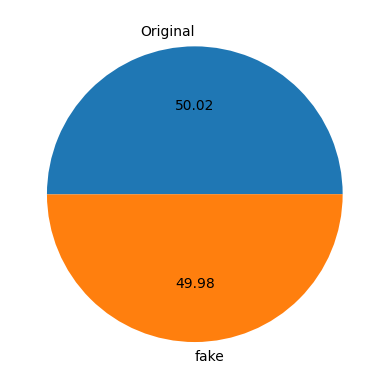

In [17]:
plt.pie(df['target'].value_counts(), labels=['Original', 'fake'],autopct="%0.2f")
plt.show()

In [18]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,What can you say about an extension cord other...,1,60,12,1
1,This knife set is awesome. I love the feel of...,0,342,84,9
2,I liked the bright colors and the contrast. Th...,0,396,85,9
3,This is a beautiful mat. Item as described and...,1,319,75,7
4,"Having just read a truly amazing book, I could...",0,263,56,5


In [20]:
df.describe()

,target,num_characters,num_words,num_sentences
count,40412.000000,40412.000000,40412.000000,40412.000000
mean,0.500223,351.365337,76.691131,5.277071
std,0.500006,369.871842,79.242859,4.915033
min,0.000000,24.000000,2.000000,1.000000
25%,0.000000,107.000000,24.000000,2.000000
50%,1.000000,198.000000,44.000000,3.000000
75%,1.000000,439.000000,96.000000,6.000000
max,1.000000,2827.000000,510.000000,133.000000


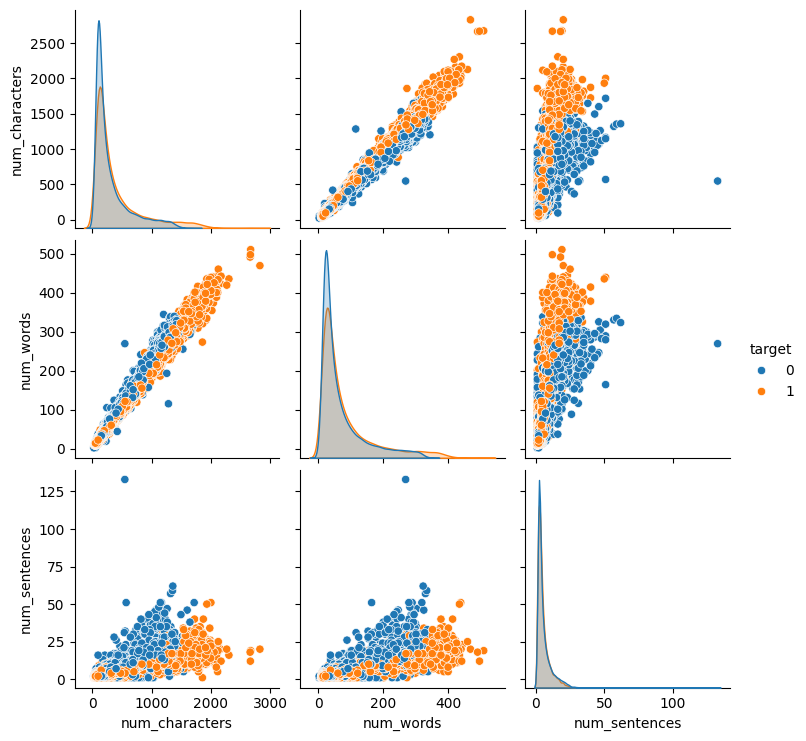

In [21]:
sns.pairplot(df,hue='target')

<Axes: >

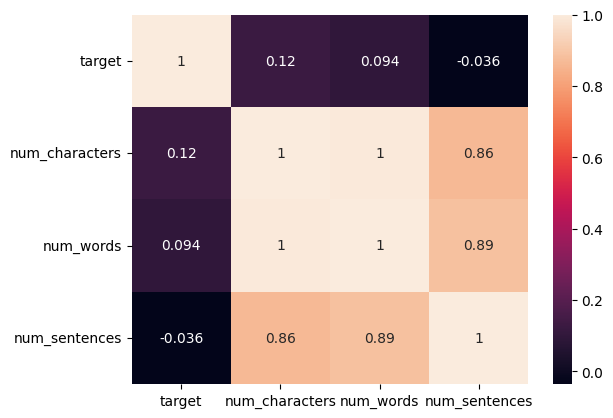

In [22]:
df_numeric = df.select_dtypes(include = 'number')
sns.heatmap(df_numeric.corr(),annot=True)

In [23]:
ps = PorterStemmer()

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [26]:
df['transformed_text'] = df['text'].apply(transform_text)

In [27]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,What can you say about an extension cord other...,1,60,12,1,say extens cord work
1,This knife set is awesome. I love the feel of...,0,342,84,9,knife set awesom love feel handl knife holder ...
2,I liked the bright colors and the contrast. Th...,0,396,85,9,like bright color contrast two star yellow gre...
3,This is a beautiful mat. Item as described and...,1,319,75,7,beauti mat item describ fast ship put matt tes...
4,"Having just read a truly amazing book, I could...",0,263,56,5,read truli amaz book could put would recommend...


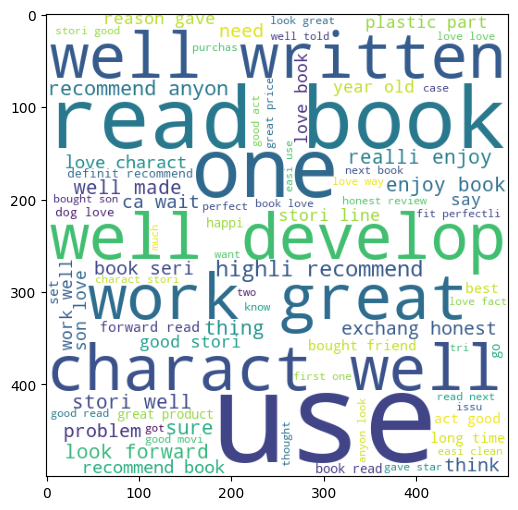

In [28]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
fake_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

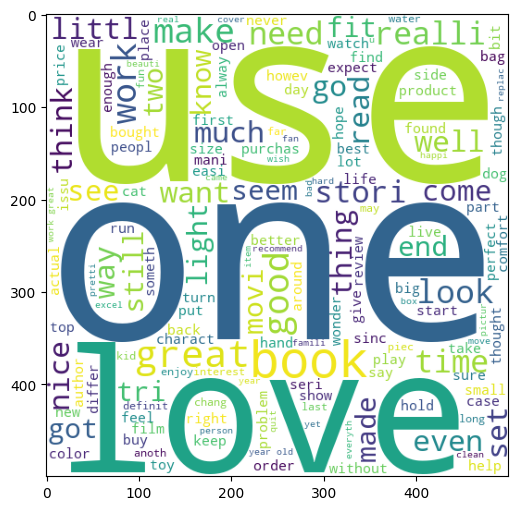

In [29]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
original_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(original_wc)

In [30]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [31]:
print(X.shape)
print(y.shape)

(40412, 3000)
(40412,)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [33]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'xgb':xgb
}

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    return accuracy,precision

In [36]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [37]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [38]:
performance_df.reset_index(drop = True)

,Algorithm,Accuracy,Precision
0,LR,0.853396,0.853438
1,NB,0.838921,0.839751
2,RF,0.834096,0.836030
3,xgb,0.813930,0.815038
4,AdaBoost,0.691451,0.694985
5,DT,0.607324,0.653803
6,KN,0.505877,0.543408


In [39]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [40]:
voting = VotingClassifier(estimators=[('LR', lrc), ('nb', mnb), ('RF', rfc)],voting='soft')

In [41]:
voting.fit(X_train,y_train)

,estimators,"[('LR', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [42]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8636644810095262
Precision 0.8718406944089865


In [43]:
estimators = [('LR', lrc), ('nb', mnb), ('RF', rfc)]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [44]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [45]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8529011505629098
Precision 0.8497524752475247


In [46]:
pickle.dump(tfidf, open("D:/Aswin/Data Science/ML project/Fake-Review-Prediction/app/vectorizer.pkl", 'wb'))
pickle.dump(voting, open("D:/Aswin/Data Science/ML project/Fake-Review-Prediction/app/model.pkl", 'wb'))